## Import Packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

## Load Dataset

In [19]:
boston = load_boston()
boston.data.shape

(506, 13)

In [4]:
X = boston['data']
y = boston['target']

## Split Train and Test Data (70/30)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 1) Default Linear Regression

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
print('Training Score: {:.2f}'.format(reg.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(reg.score(X_test, y_test)))

Training Score: 0.75
Test Score: 0.71


In [10]:
pred = reg.predict(X_test)

In [11]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.835696361418929
MSE: 28.547585271468172
RMSE: 5.342994036256092


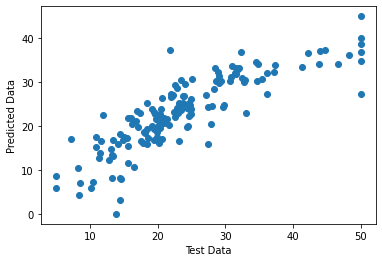

In [101]:
plt.scatter(y_test,pred)
plt.xlabel('Test Data')
plt.ylabel('Predicted Data');

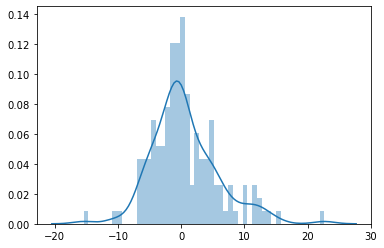

In [14]:
sns.distplot((y_test-pred),bins=50);

In [22]:
coefficients = pd.DataFrame(reg.coef_, boston['feature_names'])
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


## 2) Compare Scores with Ridge Regression
### L2 Regularization which minimizes the weights (coefficients)

In [24]:
#default alpha=1
ridge = Ridge()

In [25]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:
print('Training Score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training Score: 0.74
Test Score: 0.71


In [34]:
#alpha=10, more regularization
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [103]:
print('Training Score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training Score: 0.74
Test Score: 0.71


In [55]:
#alpha=0.1, less regularization, moves closer to linear regression function
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

In [104]:
print('Training Score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training Score: 0.75
Test Score: 0.71


## 3) Compare Scores with Lasso Regression
### L1 Regularization which minimizes the weights (coefficients) and minimizes the features being used

In [40]:
#default alpha=1
lasso = Lasso().fit(X_train, y_train)

In [106]:
print('Training Score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used:', np.sum(lasso.coef_ != 0))

Training Score: 0.67
Test Score: 0.62
Number of features used: 10


In [113]:
#alpha=0.1, less regularization, more features used, moves closer to linear regression function
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)

In [114]:
print('Training Score: {:.2f}'.format(lasso01.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(lasso01.score(X_test, y_test)))
print('Number of features used:', np.sum(lasso01.coef_ != 0))

Training Score: 0.73
Test Score: 0.70
Number of features used: 11


In [82]:
#alpha=10, more regularization, less features used
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)

In [108]:
#poor performance
print('Training Score: {:.2f}'.format(lasso10.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(lasso10.score(X_test, y_test)))
print('Number of features used:', np.sum(lasso10.coef_ != 0))

Training Score: 0.53
Test Score: 0.50
Number of features used: 5
